<a href="https://colab.research.google.com/github/Shubhdeep3/PRODIGY_ML_01/blob/main/Intern2025_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              924 non-null    object 
 1   Zip                  924 non-null    object 
 2   Price                920 non-null    float64
 3   Square footage area  924 non-null    int64  
 4   Bedrooms             924 non-null    int64  
 5   Bathrooms            924 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 50.5+ KB


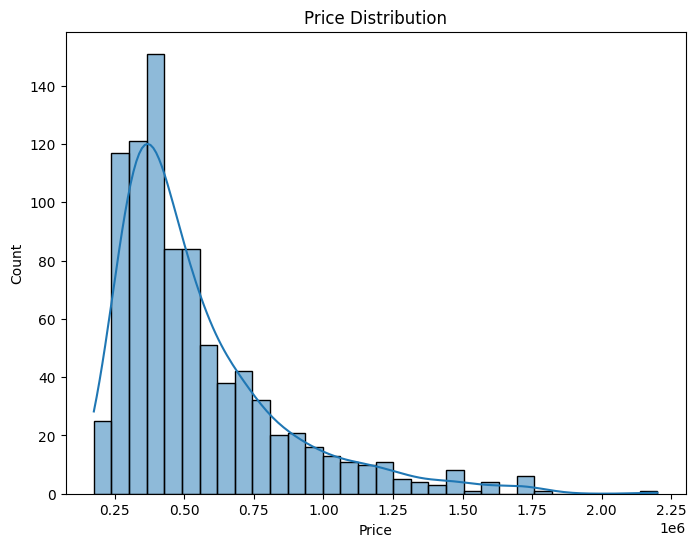

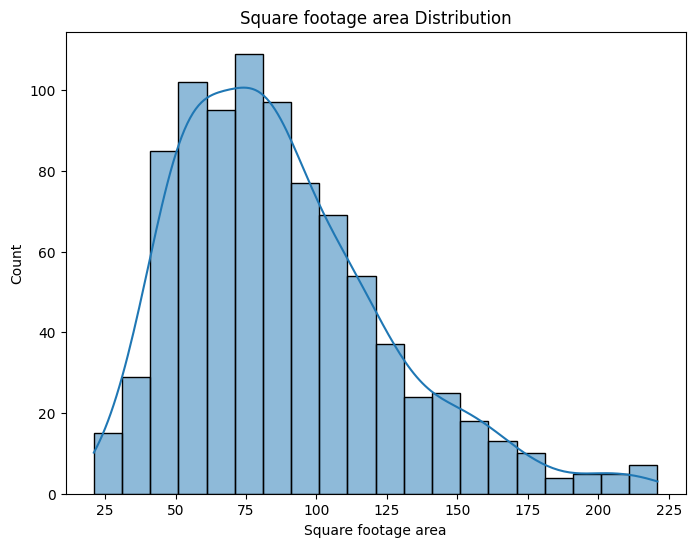

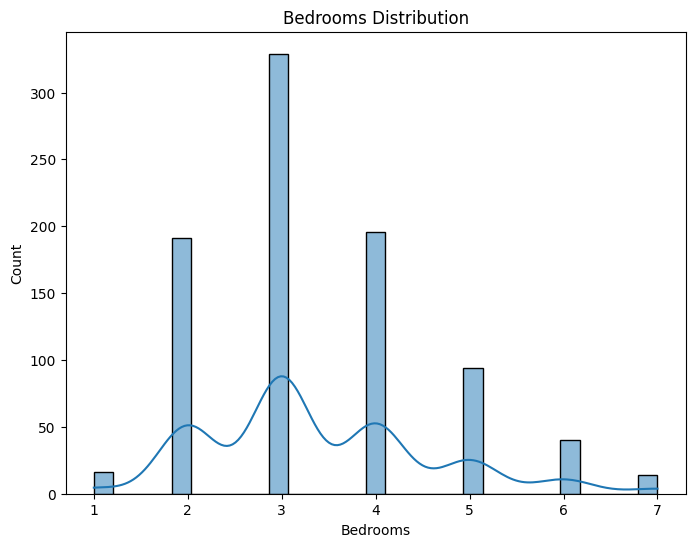

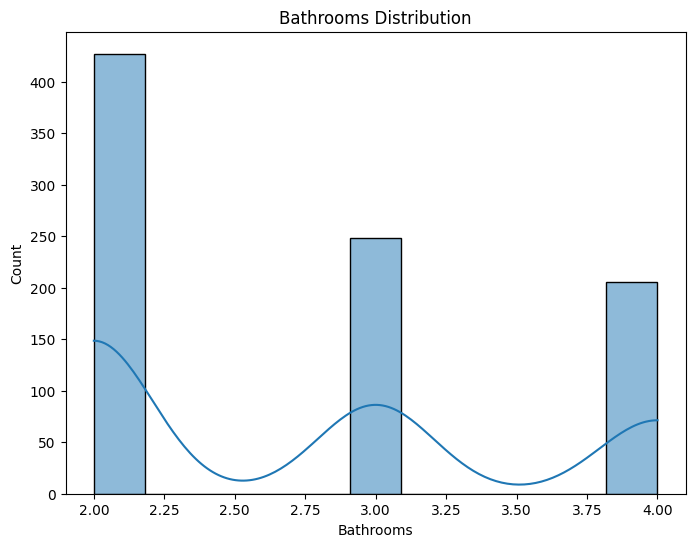

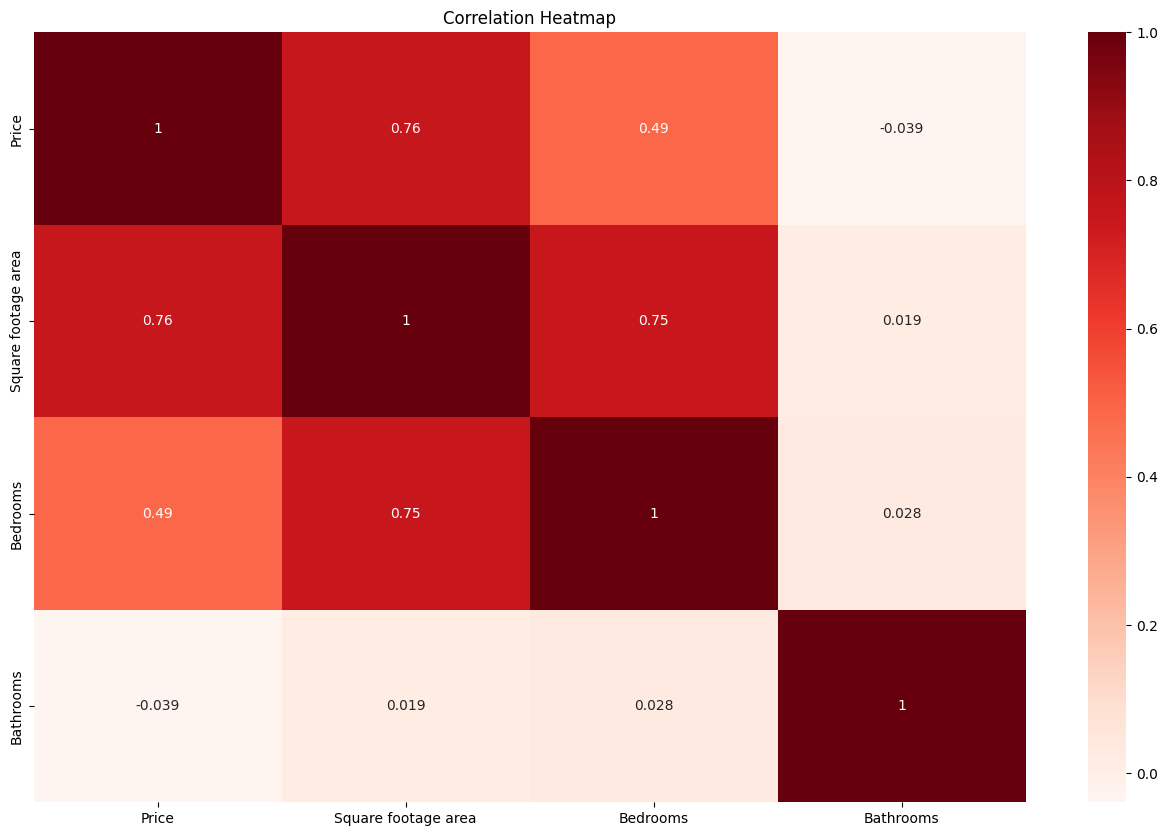

Mean Squared Error: 30063171593.62327
Enter the square footage of the house: 45
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted price for the new house: $271,024.22


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

import re

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/new HousingPrices-Amsterdam-August-20216.csv', thousands=r',',index_col=0)
df
df.shape

df.info()
df.describe()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
# Delete unneeded columns
df.drop(columns=['Address', 'Zip'], axis=1, inplace=True)
# list each of Categorical and Numerical columns
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()
# Dealing with outliers
for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
def num_cols_vis(col):
     plt.figure(figsize=(8, 6))
     sns.histplot(data=df, x=col, kde=True)
     plt.title(f'{col} Distribution')
     plt.show()
# Call the previous function
for col in numerical_columns:
     num_cols_vis(col)

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()
X = df.drop(['Price'], axis=1)
y = df['Price']
X
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

square_footage = float(input("Enter the square footage of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))

# Create a DataFrame for the new house features with correct column names
new_house_features = pd.DataFrame([[square_footage, bedrooms, bathrooms]], columns=['Square footage area', 'Bedrooms', 'Bathrooms'])

# Predict the price
predicted_price = model.predict(new_house_features)

# Print the predicted price
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")